You are given an array points representing integer coordinates of some points on a 2D-plane, where points[i] = [xi, yi].

The cost of connecting two points [xi, yi] and [xj, yj] is the manhattan distance between them: |xi - xj| + |yi - yj|, where |val| denotes the absolute value of val.

Return the minimum cost to make all points connected. All points are connected if there is exactly one simple path between any two points.

Example 1:

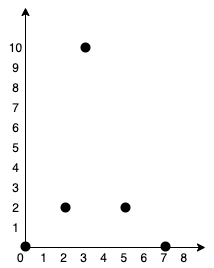

Input: points = [[0,0],[2,2],[3,10],[5,2],[7,0]]
Output: 20
Explanation: 

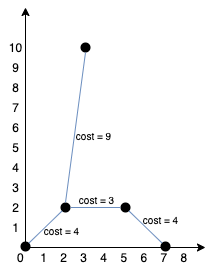

We can connect the points as shown above to get the minimum cost of 20.
Notice that there is a unique path between every pair of points.

Example 2:

Input: points = [[3,12],[-2,5],[-4,1]]
Output: 18

 

Constraints:

    1 <= points.length <= 1000
    -106 <= xi, yi <= 106
    All pairs (xi, yi) are distinct.



In [39]:
from typing import List
from math import inf


class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        paths = []
        ans = 0
        point_set = set()
        for i in range(0, len(points)):
            for j in range(i + 1, len(points)):
                dist = abs(points[i][0] - points[j][0]) + abs(points[i][1] - points[j][1])
                paths.append((dist, i, j))
                
        paths = sorted(paths)
        for dist, point1, point2 in paths:
            if not ((point1 in point_set) and (point2 in point_set)):
                ans += dist
                point_set.add(point1)
                point_set.add(point2)
            if len(point_set) == len(points):
                break
        return ans

In [13]:
from typing import List
from math import inf


class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        paths = {(x, y): inf for x, y in points}
        paths[tuple(points[0])] = 0 # select start point
        res = 0
        while paths:
            x, y = min(paths, key=paths.get) # take point with minimal distance
            res += paths[(x, y)] # add distance to result
            del paths[(x, y)]  # possible to replace with pop
            for xp, yp in paths.keys():
                paths[(xp, yp)] = min(paths[(xp, yp)], abs(x - xp) + abs(y - yp)) # update minimal distance to all points in joint points
        return res
        

In [40]:
s = Solution()
s.minCostConnectPoints([[0,0],[2,2],[3,10],[5,2],[7,0]]) # 20

20

In [41]:
s.minCostConnectPoints([[3,12],[-2,5],[-4,1]]) # 18

18

In [42]:
s.minCostConnectPoints([[0,0],[1,1],[1,0],[-1,1]]) # 4

4